In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [3]:
df = pd.read_csv("mental_health_workplace_survey.csv")
print("Original columns:")
for col in df.columns:
    print(f"'{col}'")


Original columns:
'EmployeeID'
'Age'
'Gender'
'Country'
'JobRole'
'Department'
'YearsAtCompany'
'WorkHoursPerWeek'
'RemoteWork'
'BurnoutLevel'
'JobSatisfaction'
'StressLevel'
'ProductivityScore'
'SleepHours'
'PhysicalActivityHrs'
'CommuteTime'
'HasMentalHealthSupport'
'ManagerSupportScore'
'HasTherapyAccess'
'MentalHealthDaysOff'
'SalaryRange'
'WorkLifeBalanceScore'
'TeamSize'
'CareerGrowthScore'
'BurnoutRisk'


In [4]:
# Strip whitespace, make lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Cleaned columns:")
print(df.columns)


Cleaned columns:
Index(['employeeid', 'age', 'gender', 'country', 'jobrole', 'department',
       'yearsatcompany', 'workhoursperweek', 'remotework', 'burnoutlevel',
       'jobsatisfaction', 'stresslevel', 'productivityscore', 'sleephours',
       'physicalactivityhrs', 'commutetime', 'hasmentalhealthsupport',
       'managersupportscore', 'hastherapyaccess', 'mentalhealthdaysoff',
       'salaryrange', 'worklifebalancescore', 'teamsize', 'careergrowthscore',
       'burnoutrisk'],
      dtype='object')


In [5]:
# See if 'sleep' is in any column name
[col for col in df.columns if 'sleep' in col]


['sleephours']

In [6]:
# Only run if 'sleep_hours' column exists
if 'sleephours' in df.columns:
    df['sleephours'].fillna(df['sleephours'].median(), inplace=True)
else:
    print("Column 'sleephours' not found!")


/tmp/ipython-input-6-4021848492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sleephours'].fillna(df['sleephours'].median(), inplace=True)


In [10]:
if 'workhoursperweek' in df.columns:
    df = df[df['workhoursperweek'] <= 18]
else:
    print("Column 'workhoursperweek' not found!")


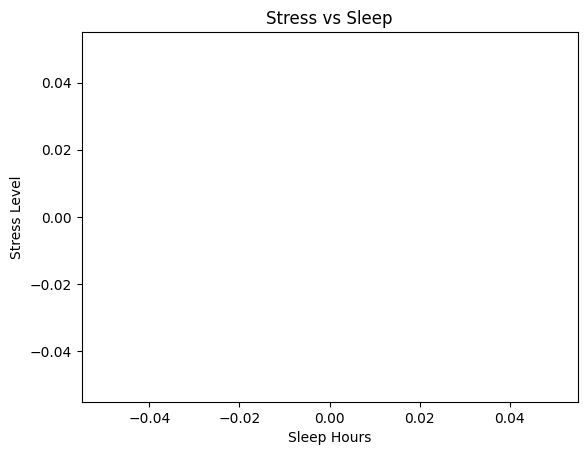

In [11]:
if 'stresslevel' in df.columns and 'sleephours' in df.columns:
    sns.scatterplot(data=df, x='sleephours', y='stresslevel')
    plt.title("Stress vs Sleep")
    plt.xlabel("Sleep Hours")
    plt.ylabel("Stress Level")
    plt.savefig("stress_vs_sleep.png")
    plt.show()
else:
    print("Cannot plot — 'sleephours' or 'stresslevel' not found.")


In [12]:
df.to_csv("cleaned_mental_health.csv", index=False)
print("Cleaned dataset saved as 'cleaned_mental_health.csv'")


Cleaned dataset saved as 'cleaned_mental_health.csv'
